In [1]:
import importlib
import heapq
import random

import CsvToExchangeData
import ExchangeData
import Regression
import Expremo

import matplotlib.pyplot as plt
import numpy as np

importlib.reload(CsvToExchangeData)
importlib.reload(ExchangeData)
importlib.reload(Regression)
importlib.reload(Expremo)

<module 'Expremo' from 'C:\\Users\\Gaudium\\Desktop\\уник\\2КУРС\\4СЕМ\\ТПР\\курсач\\прог\\Expremo.py'>

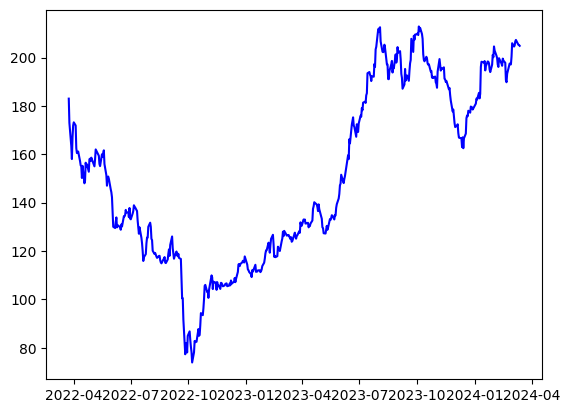

In [29]:
nlmk_data = CsvToExchangeData.exchange_data_list_from_csv(csv_path="Прошлые данные - NLMK.csv", 
                                                          exchange_data_type=ExchangeData.ExchangeDataType.Stock, 
                                                          name="NLMK")

price = [float(nlmk_data[i].price) for i in range(len(nlmk_data))]
plt.plot([data.date for data in nlmk_data], price, color='blue')
plt.show()

In [3]:
moex_data = CsvToExchangeData.exchange_data_list_from_csv("Прошлые данные - ММВБ – Индекс Мосбиржи.csv", ExchangeData.ExchangeDataType.Stock, "MOEX")
moex_data.reverse()
for index in moex_data:
    # print(index)
    pass

In [4]:
Regression.DEBUG = False
test_data = nlmk_data

time = [i+1 for i in range(len(nlmk_data))]
# time = [data.date.timestamp() for data in nlmk_data]
price = [float(nlmk_data[i].price) for i in range(len(nlmk_data))]

RegressionType.Exponential


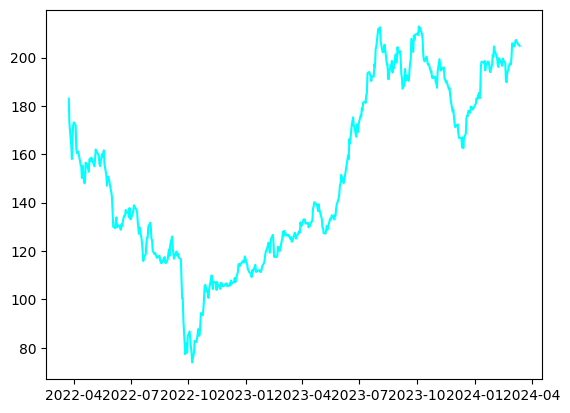

In [26]:
# nlmk_prediction = Regression.fit_best_regression(price, time)
prediction_func = Regression.fit_regression(price, time, Regression.RegressionType.Power)
prediction_set = [prediction_func(i) for i in time]

plt.plot([data.date for data in nlmk_data], price, color='cyan')
# plt.plot([data.date for data in nlmk_data], prediction_set, color='red')
# plt.gca().invert_xaxis()
# plt.show()
print(Regression.get_best_regression_type(time, price))
# print(prediction_set)

Предсказанное значение: 181.05325309816362
Относительная погрешность предсказания: 0.03035085988028468
RegressionType.Quadratic


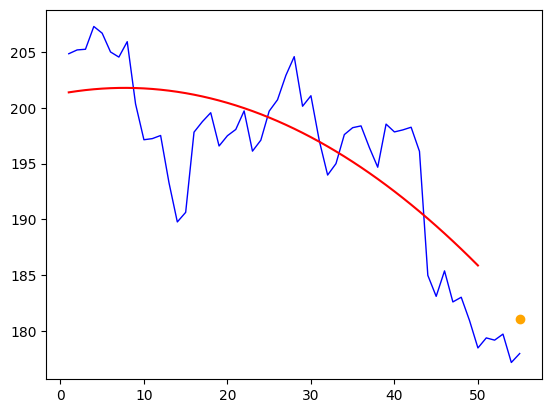

In [82]:
predictor = Expremo.Expremo(price, time)
# predictor.set_regression_type(Regression.get_best_regression_type(price, time))

print(f"Предсказанное значение: {predictor.predict(0, 50, 5)}")
print(f"Относительная погрешность предсказания: {Expremo.calculate_relative_prediction_error(predictor, 5)}")
print(predictor.regression_type)
Expremo.plot_prediction(predictor, 5)

Предсказанное значение: 163.89612505147176
Относительная погрешность предсказания: 0.04656122715839586
RegressionType.Quadratic


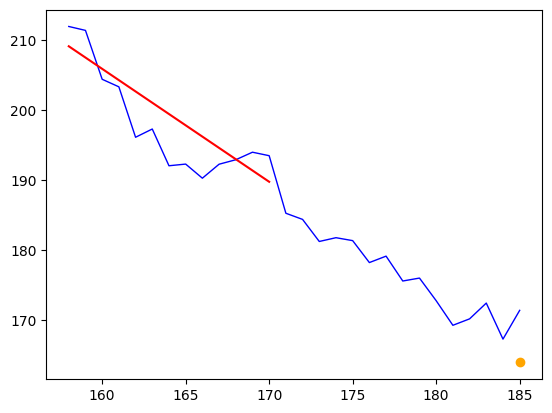

In [81]:
print(f"Предсказанное значение: {predictor.predict(157, 13, 15)}")
print(f"Относительная погрешность предсказания: {Expremo.calculate_relative_prediction_error(predictor, 15)}")
print(predictor.regression_type)
Expremo.plot_prediction(predictor, 15)

# plt.plot(time, price, color='blue')
# plt.plot(time, [predictor.regression_func(time) for time in time], color='red')

In [8]:
print(predictor.predict_trend(0, 50, 5))
print(Expremo.calculate_absolute_prediction_error(predictor, 5))
print(Expremo.calculate_relative_prediction_error(predictor, 5))

TrendType.Downward
4.091177357096086
0.031230361504550275


RegressionType.Exponential
RegressionType.Exponential
RegressionType.Exponential
RegressionType.Linear


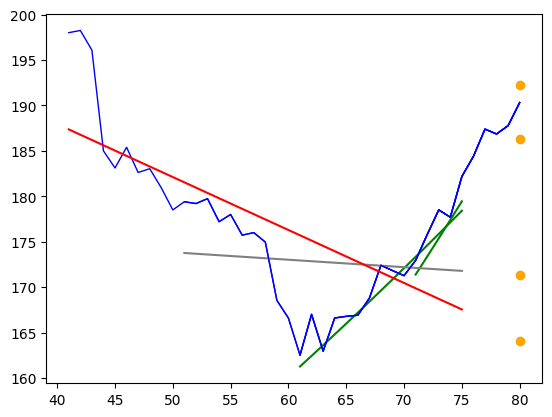

In [99]:
prediction_point = 80
prediction_distance = 5
train_range = range(5, 40, 10)

for train in train_range:
    start_point = prediction_point - prediction_distance - train
    predictor.predict(start_point, train, prediction_distance)
    Expremo.plot_prediction(predictor, prediction_distance)
    print(predictor.regression_type)

In [9]:
step = 20
prediction_distance = 3
regression_type = None  # None for best type

Point: 0, RegressionType.Quadratic
Point: 20, RegressionType.Linear
Point: 40, RegressionType.Linear
Point: 60, RegressionType.Linear
Point: 80, RegressionType.Linear
Point: 100, RegressionType.Exponential
Point: 120, RegressionType.Quadratic
Point: 140, RegressionType.Exponential
Point: 160, RegressionType.Exponential
Point: 180, RegressionType.Exponential
Point: 200, RegressionType.Exponential
Point: 220, RegressionType.Exponential
Point: 240, RegressionType.Exponential
Point: 260, RegressionType.Exponential
Point: 280, RegressionType.Exponential
Point: 300, RegressionType.Exponential
Point: 320, RegressionType.Exponential
Point: 340, RegressionType.Quadratic
Point: 360, RegressionType.Quadratic
Point: 380, RegressionType.Linear
Point: 400, RegressionType.Exponential
Point: 420, RegressionType.Quadratic
Point: 440, RegressionType.Exponential
Point: 460, RegressionType.Exponential
Point: 480, RegressionType.Quadratic


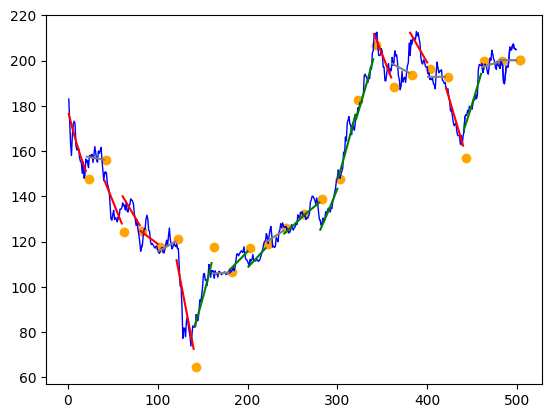

In [10]:
# predictor.add_excluded_type(Regression.RegressionType.Linear)
# predictor.add_excluded_type(Regression.RegressionType.Exponential)
# predictor.add_excluded_type(Regression.RegressionType.Power)
# predictor.add_excluded_type(Regression.RegressionType.Quadratic)

for i in range(0, len(test_data), step):
    predictor.predict(i, step, prediction_distance)
    if regression_type is not None:
        predictor.regression_type = regression_type
        predictor.update_regression_func()

    print(f"Point: {i}, {predictor.regression_type}")
    Expremo.plot_prediction(predictor, prediction_distance)
    
Expremo.plot_prediction(predictor, prediction_distance)

Производим прогнозирование по всем данным

In [100]:
error_results = {}

step = 5
train_max = 60  # 60
prediction_max = 40  # 40

for train in range(2, train_max, step):
    for prediction in range(2, prediction_max, step):
        abs_sum = 0
        relative_sum = 0
        profit_sum = 0
        correct_trend_count = 0
        count = 0
        
        balance = 0 
        
        for start in range(0, len(test_data), prediction):
            predictor.predict(start, train, prediction)
            
            if start + train + prediction > len(test_data) - 1:
                continue
                
            absolute_error = Expremo.calculate_absolute_prediction_error(predictor, prediction)
            relative_error = Expremo.calculate_relative_prediction_error(predictor, prediction)
            
            profit = Expremo.calculate_profit(predictor, prediction)            
            is_correct_trend = Expremo.is_correct_trend(predictor, prediction)
            
            trend = predictor.predict_trend(start, train, prediction)
            
            byu_sell_price = predictor.price_data[start + train]
            if trend == Expremo.TrendType.Upward:
                balance -= byu_sell_price
            elif trend == Expremo.TrendType.Downward:
                balance += byu_sell_price            
            
            abs_sum += absolute_error
            relative_sum += relative_error
            profit_sum += profit
            correct_trend_count += is_correct_trend
            count += 1
            
            print(f"Start: {start}, train_dist: {train}, pred_dist: {prediction}, abs: {absolute_error}, relative: {relative_error}, profit: {profit}, correct_trend: {correct_trend_count}/{count}={correct_trend_count / count}, balance: {balance}")
            
        if count == 0:
            continue
            
        error_results[(train, prediction)] = {"absolute": abs_sum / count,
                                              "relative": relative_sum/count,
                                              "profit": profit_sum/count,
                                              "correct_trend": correct_trend_count/count,
                                              "balance": balance}
        
print(error_results)

Start: 0, train_dist: 2, pred_dist: 2, abs: 0.8183060345762101, relative: 0.003959289890537111, profit: 1.4399999999999977, correct_trend: 1/1=1.0, balance: 0
Start: 2, train_dist: 2, pred_dist: 2, abs: 6.8810317899443305, relative: 0.03364149696853589, profit: -2.140000000000015, correct_trend: 2/2=1.0, balance: 0
Start: 4, train_dist: 2, pred_dist: 2, abs: 1.3000000000002103, relative: 0.006488968753120746, profit: -4.199999999999989, correct_trend: 3/3=1.0, balance: 0
Start: 6, train_dist: 2, pred_dist: 2, abs: 11.467994762356852, relative: 0.05814233807725031, profit: -3.0999999999999943, correct_trend: 4/4=1.0, balance: 0
Start: 8, train_dist: 2, pred_dist: 2, abs: 2.559999999999377, relative: 0.013243662700462374, profit: -3.9399999999999977, correct_trend: 4/5=0.8, balance: 197.24
Start: 10, train_dist: 2, pred_dist: 2, abs: 7.441193020178872, relative: 0.03903269523803437, profit: -2.660000000000025, correct_trend: 5/6=0.8333333333333334, balance: 197.24
Start: 12, train_dist: 

C:\Users\Gaudium\Desktop\уник\2КУРС\4СЕМ\ТПР\курсач\прог\Regression.py:44: RuntimeWarning: overflow encountered in scalar add
  [sum(x ** 3), sum(x ** 2), sum(x)],


Start: 28, train_dist: 22, pred_dist: 7, abs: 1.4962845849804296, relative: 0.008552152406152431, profit: -4.439999999999998, correct_trend: 3/5=0.6, balance: 179.4
Start: 35, train_dist: 22, pred_dist: 7, abs: 2.31415019762872, relative: 0.013875465868981415, profit: -8.180000000000007, correct_trend: 3/6=0.5, balance: 354.36
Start: 42, train_dist: 22, pred_dist: 7, abs: 22.115158102715412, relative: 0.1258115718666254, profit: 9.0, correct_trend: 3/7=0.42857142857142855, balance: 521.14
Start: 49, train_dist: 22, pred_dist: 7, abs: 25.21383399209543, relative: 0.13427326654646624, profit: 12.0, correct_trend: 3/8=0.375, balance: 696.92
Start: 56, train_dist: 22, pred_dist: 7, abs: 7.2758412361691285, relative: 0.03722800468772579, profit: 7.659999999999997, correct_trend: 3/9=0.3333333333333333, balance: 509.14
Start: 63, train_dist: 22, pred_dist: 7, abs: 18.81873499582153, relative: 0.09917124260023993, profit: -5.680000000000007, correct_trend: 3/10=0.3, balance: 313.7
Start: 70, 

In [105]:
# Получение списка из минимальных элементов 
min_relative_keys = heapq.nlargest(10, error_results, key=lambda k: error_results[k]["correct_trend"])

# Вывод списка 
for key in min_relative_keys:
    print(f"\n  train_distance: {key[0]}, prediction_distance: {key[1]}")
    print(error_results[key])


  train_distance: 22, prediction_distance: 37
{'absolute': 43.184460286813724, 'relative': 0.2986536892231127, 'profit': -3.4183333333333343, 'correct_trend': 0.6666666666666666, 'balance': 483.70000000000016}

  train_distance: 27, prediction_distance: 37
{'absolute': 37.781524400121924, 'relative': 0.2599725491057096, 'profit': -4.131666666666668, 'correct_trend': 0.6666666666666666, 'balance': 450.58000000000004}

  train_distance: 2, prediction_distance: 2
{'absolute': 6.035551019115597, 'relative': 0.0410473357449002, 'profit': -0.08967741935483875, 'correct_trend': 0.5403225806451613, 'balance': 1302.5799999999992}

  train_distance: 17, prediction_distance: 37
{'absolute': 48.88779560716944, 'relative': 0.3358314197274928, 'profit': -1.273846153846154, 'correct_trend': 0.5384615384615384, 'balance': 800.26}

  train_distance: 7, prediction_distance: 2
{'absolute': 4.814525252676243, 'relative': 0.033594410055966466, 'profit': -0.13436734693877553, 'correct_trend': 0.51428571428

{'absolute': 27.92149312922267, 'relative': 0.1889411518750657, 'profit': 1.0531707317073173, 'correct_trend': 0.2682926829268293, 'balance': 1018.2200000000005}


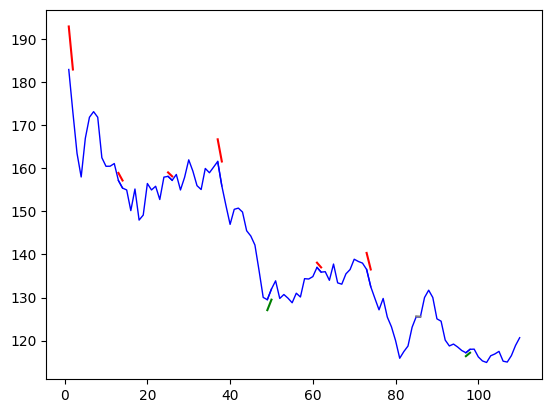

In [13]:
train = 2
pred = 12
print(error_results[(train, pred)])
# print(predictor.predict(0, train, pred))
# print(Expremo.calculate_profit(predictor, pred))
# Expremo.plot_prediction(predictor, pred)
# Expremo.calculate_relative_prediction_error(predictor, pred)

start_max = 100
for start in range(0, start_max, pred):
    predictor.predict(start, train, pred)
    Expremo.plot_prediction(predictor, pred, False)

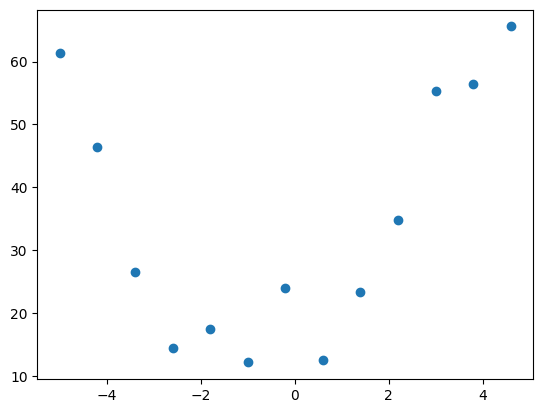

In [14]:
random.seed(0)
def prez_func(x):
    return 2*x**2 + 3*x + 1 + random.random()*30

xs = np.arange(-5, 5, 0.8)
ys = [prez_func(x) for x in xs]

plt.plot(xs, ys, linestyle='', marker='o')

[61.33265554575144, 46.41863208820907, 26.53714742492535, 14.487502508788904, 17.41824164105826, 12.148024123512428, 23.993957671043177, 12.619381782367817, 23.41790862457066, 34.78146118365092, 55.24338655586003, 56.42060567452165, 65.57513533199106]


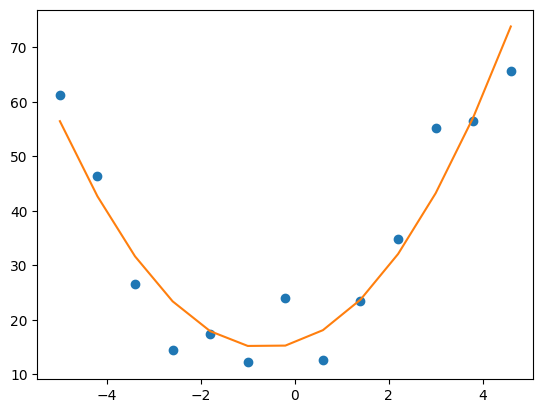

In [15]:
print(ys)
func = Regression.fit_regression(ys, xs, Regression.RegressionType.Quadratic)
plt.plot(xs, ys, linestyle='', marker='o')
plt.plot(xs, [func(x) for x in xs])